# Growing Pain: College Tuition, Enabling Policies, and Student Loan Growth in America

### Project Description: 

Higher education costs at American institutions have been increasing steadily over the last few decades. Concurrently, student debt has also been increasing. Today, total outstanding student debt is about $1.2 trillion, the second highest debt category only behind mortgages (MarketWatch.com).  

Has growth in higher education tuition been constant over the last few decades or did it skyrocket more recently?  Do growth rates in tuition costs vary based on whether institutions are private or public? Is it possible that these tuition increases are associated with policies that made loans for higher education costs readily available to students? 

These are some of the questions we will set to answer in our Data Bootcamp final project. Our goal is to use publicly available data sources to paint a picture of some trends in higher education for students in the United States. The purpose of our analysis is to depict these trends and understand if they are associated with specific government actions. 

Our hypothesis is that higher education tuition costs skyrocketed with the introduction of favorable government policy in the late 1970s, which subsidized loans and guaranteed banks a favorable rate of return on these student loans. 


#### Contributors:
- Adriana Madgas 
- Depeng Jin 
- Silvio Scagnelli

May, 2016


Source: http://www.marketwatch.com/story/americas-growing-student-loan-debt-crisis-2016-01-15 

In [12]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import pandas.io.data as web           # To read FRED Data
import seaborn as sns                  # To import seaborn package 
import plotly                          # To import plotly package 
import requests, io                    # internet and input tools  
from bs4 import BeautifulSoup          # website parsing

%matplotlib inline                     

# check versions (overkill, but why not?)
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())
print('Seaborn version: ', sns.__version__)
print('Plotly version: ', plotly.__version__)

Python version:  3.5.1 |Anaconda 2.5.0 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Today:  2016-05-09
Seaborn version:  0.7.0
Plotly version:  1.9.10


### Section 1: Selecting and Cleaning Data

#### 1.a: Historic Tuition Costs

The data below is from the National Center for Education Statistics and shows trends in tuition costs since the 1960s. 

The table we selected is Table 330.10. Average undergraduate tuition and fees and room and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: 1963-64 through 2012-13. 

The data can be accessed here: https://nces.ed.gov/programs/digest/d13/tables/dt13_330.10.asp

__Obtaining and cleaning the data:__

- We imported the data from an excel file stored on the National Center for Education Statistics website 
- We renamed the columns in a consistent and thorough manner and removed rows with unnecessary content
- We dropped all empty values and removed dots from the number columns to allow for easy graphing

In [13]:
# Import Excel from Website / nationalcenterforedstats file tuition
URL_NCES = "https://nces.ed.gov/programs/digest/d13/tables/xls/tabn330.10.xls"
tuitiontrends = pd.read_excel(URL_NCES, sep='\t')

#Rename columns so that they are not gibberish 

tuitiontrends = tuitiontrends.rename(columns={'Unnamed: 1': 'TotalCost/All/Constant', 'Unnamed: 2':'Total/4Y/Constant',
                                              'Unnamed: 3':'Total/2Y/Constant','Unnamed: 4':'Tuition/All/Constant',
                                             'Unnamed: 5':'Tuition/4Y/Constant', 'Unnamed: 6':'Tuition/2Y/Constant', 
                                            'Unnamed: 7':'Dorms/All/Constant','Unnamed: 8':'Dorms/4Y/Constant', 
                                              'Unnamed: 9':'Dorms/2Y/Constant',
                                             'Unnamed: 10':'Board/All/Constant', 'Unnamed: 11': 'Board/4Y/Constant', 
                                              'Unnamed: 12':'Board/2Y/Constant', 'Unnamed: 13': 'TotalCost/All/Current', 
                                              'Unnamed: 14':'Total/4Y/Current','Unnamed: 15':'Total/2Y/Current',
                                              'Unnamed: 16':'Tuition/All/Current',
                                             'Unnamed: 17':'Tuition/4Y/Current', 'Unnamed: 18':'Tuition/2Y/Current', 
                                              'Unnamed: 19':'Dorms/All/Current','Unnamed: 20':'Dorms/4Y/Current', 
                                              'Unnamed: 21':'Dorms/2Y/Current',
                                             'Unnamed: 22':'Board/All/Current', 'Unnamed: 23': 'Board/4Y/Current', 
                                              'Unnamed: 24': 'Board/2Y/Current'})

#dropped because not all were NaN but all were redundant 
tuitiontrends = tuitiontrends.drop([0, 1, 2,]) 

# Further cleaning of dataframe and renaming 
names = list(tuitiontrends)
tuitiontrends = tuitiontrends.rename(columns={names[0]: 'Year'})
tuitiontrends = tuitiontrends.dropna()

# Note: Constant means all the numerical values are in 2012 - 2013 dollars   
# Note: Current means all the numerical values are in nominal terms of their respective year

# Slipting the dataframes into one that covers all institutions, private institutions, or public institutions 

all_institutions = tuitiontrends.head(51)
all_institutions ['Year']= all_institutions['Year'].str.replace(".", "")
all_institutions ['YEAR']= all_institutions['Year'].str[0:4].convert_objects(convert_numeric=True)
#all_institutions = all_institutions.set_index(['Real_Year'])

public_institutions = tuitiontrends.ix[66:124]
public_institutions ['Year']= public_institutions['Year'].str.replace(".", "")
public_institutions ['YEAR']= public_institutions['Year'].str[0:4].convert_objects(convert_numeric=True)
#public_institutions = public_institutions.set_index(['Real_Year'])

private_institutions = tuitiontrends.ix[127:185]
private_institutions ['Year']= private_institutions['Year'].str.replace(".", "")
private_institutions ['YEAR']=private_institutions['Year'].str[0:4].convert_objects(convert_numeric=True)
#private_institutions = private_institutions.set_index(['Real_Year'])

print (all_institutions.head())
print (public_institutions.head())
print (private_institutions.head())

       Year TotalCost/All/Constant Total/4Y/Constant Total/2Y/Constant  \
3         1                      2                 3                 4   
5  1963-64                 9360.92            9647.4           5816.68   
6  1964-65                 9502.85           9817.57           6230.82   
7  1965-66                 9597.88           9970.62           6412.34   
8  1966-67                 9685.27           10115.5           6506.44   

  Tuition/All/Constant Tuition/4Y/Constant Tuition/2Y/Constant  \
3                    5                   6                   7   
5              3812.47                4145             1284.57   
6              3925.71             4297.11             1387.39   
7              3977.08             4397.65             1470.77   
8              4034.09             4500.26             1506.13   

  Dorms/All/Constant Dorms/4Y/Constant Dorms/2Y/Constant  ...   \
3                  8                 9                10  ...    
5            2117.89      

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: SettingWithCopyWarning:


A value is trying to be set on

#### 1.b Historic Loans 

The data below is from the College Board and intended to help us visualize the amount of federal and nonfederal loans held by students from the academic year 1994-1995 to the academic year 2014. We want to understand the growth in student loans and observe any changes in loan trends.

There are 6 different types of loans - Federal Subsidized Loans, Federal Unsubsidized Loans, Parent PLUS Loans, Grad PLUS Loans, Perkins Loans, and Nonfederal Loans.  For each type of loan there is also the relative weight to the total of that year.


__Obtaining and cleaning the data:__
- We imported the data from an excel file stored on the College Board website
- We removed unnecessary rows, set the year as the index and the loan types as the column headers
- We added a column with the total of all the different types of loans, for each year

The data can be accessed here: http://trends.collegeboard.org/student-aid/figures-tables/total-federal-and-nonfederal-loans-over-time

In [14]:
# Read the file and drop the lines we do not need 
url = 'http://trends.collegeboard.org/sites/default/files/sa-2015-figure5.xls'
loans = pd.read_excel(url, 
                     skiprows=1,       # skip the first row 
                     skipfooter=11,      # skip the last 7 
                     index_col=0,       # set the index as the first column
                     header=0       # set the variable names 
                     )
# Convert the headers to whole single numbers
new_headers = []
for stuff in range(len(loans.columns)):
    if int(loans.columns[stuff].split('-')[0]) > 50:
        new_headers = new_headers + [str(1900+int(loans.columns[stuff].split('-')[0]))]
    else:
        new_headers = new_headers + [str(2000+int(loans.columns[stuff].split('-')[0]))]
loans.columns = new_headers

# Transpond to have years as index and loan type as headers
loans = loans.T
loans = loans.reset_index().rename(columns={'index':'YEAR'}).convert_objects(convert_numeric=True)

# Visualize the dataframe to check if everythig is as we want it to be
print(loans.head())

   YEAR  Federal Subsidized Loans  Federal Unsubsidized Loans  \
0  1994                 21.882429                   10.001174   
1  1995                 23.489862                   12.104305   
2  1996                 24.256172                   13.865024   
3  1997                 23.926705                   15.103232   
4  1998                 23.808797                   15.912809   

   Parent PLUS Loans  Grad PLUS Loans  Perkins Loans  Nonfederal Loans  \
0           2.543927                0       1.558831          0.000000   
1           3.225914                0       1.607602          2.077852   
2           3.584821                0       1.550446          2.822580   
3           3.974637                0       1.576458          3.429019   
4           4.316434                0       1.562059          4.233609   

       Total  
0  35.986361  
1  42.505535  
2  46.079042  
3  48.010051  
4  49.833707  


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



#### 1.c Macroeconomic Data   

The Federal Reserve Bank of St. Louis, through its FRED Database, provides a wealth of economic data and information. We will use some of this macroeconomic data to paint a more complete picture of the overall economic conditions that are contemporary to the trends we are observing in higher education tuition and student indebtedness. 

__Obtaining and cleaning the data:__

- Set the time range for the data we wanted to extract
- Used the web.DataReader to extract the data in the time range and store it in corresponding variables
- Created data frames for each of the variables and added a "Year" variable for ease of comparison

__Setting-up the data for the regression analysis:__

- Create three new data frames that consist of GDP and loan data
- Add the data for all institutions, private institutions, or public institutions to each of the new dataframes 

The data can be accessed here: https://research.stlouisfed.org/fred2/

In [15]:
#Setting Start and End dates 

start = dt.datetime(1963,1,1)
end = dt.datetime(2014,1,1)

# Reading FRED Data on monthly inflation

inflation = web.DataReader("CPIAUCSL","fred",start,end)
inflation=inflation.reset_index()
#data we selected is seasonally adjusted and monthly CPI

# Reading Quarterly GDP 

gdp=web.DataReader("GDP", "fred", start, end)
gdp=gdp.reset_index()

# Reading Quarterly Real GDP

rgdp=web.DataReader("GDPC1", "fred", start, end)
rgdp=rgdp.reset_index()

#Add year variable to the dataframes

gdp['YEAR']=gdp['DATE'].dt.year
rgdp['YEAR']=rgdp['DATE'].dt.year
inflation['YEAR']=inflation['DATE'].dt.year

#Create new dataframes with yearly data to be consistent

y_rgdp=rgdp[['YEAR','GDPC1']].groupby('YEAR').mean().reset_index()
y_gdp=gdp[['YEAR','GDP']].groupby('YEAR').mean().reset_index()
y_inflation=inflation[['YEAR','CPIAUCSL']].groupby('YEAR').mean().reset_index()

print(y_gdp.head())
print(y_rgdp.head())
print(y_inflation.head())

   YEAR      GDP
0  1963  638.575
1  1964  685.775
2  1965  743.725
3  1966  815.050
4  1967  861.725
   YEAR     GDPC1
0  1963  3530.425
1  1964  3734.050
2  1965  3976.675
3  1966  4238.950
4  1967  4355.225
   YEAR   CPIAUCSL
0  1963  30.633333
1  1964  31.038333
2  1965  31.528333
3  1966  32.470833
4  1967  33.375000


#### 1.d Merging Dataframes

- We merged the dataframes so that we can compare macro indicators with loans and tuitions
- We also calculated year over year growth rates of the key variables 

In [16]:
# For regression purpose, we create a new data frame

# One for all institutions

combo_all = pd.merge(y_gdp,loans,
                     how='left',
                     on='YEAR')

combo_all = pd.merge(combo_all, all_institutions,
                     how='left',
                     on='YEAR')

# One for private institutions

combo_private = pd.merge(y_gdp,loans,
                     how='left',
                     on='YEAR')

combo_private = pd.merge(combo_private, private_institutions,
                     how='left',
                     on='YEAR')

# One for public institutions

combo_public = pd.merge(y_gdp,loans,
                     how='left',
                     on='YEAR')

combo_public = pd.merge(combo_public, public_institutions,
                     how='left',
                     on='YEAR')


In [17]:
# Calculating growth rates

all_GDP_g = []
pvt_GDP_g = []
pub_GDP_g = []

all_tuition_g = []
pvt_tuition_g = []
pub_tuition_g = []

all_loan_g = []
pvt_loan_g = []
pub_loan_g = []


for yr in range (0,51):
    all_GDP_g = all_GDP_g + [100.0*((combo_all['GDP'][yr+1]/combo_all['GDP'][yr])-1)]
    all_tuition_g = all_tuition_g + [100.0*((combo_all['TotalCost/All/Current'][yr+1]/combo_all['TotalCost/All/Current'][yr])-1)]
    all_loan_g = all_loan_g + [100.0*((combo_all['Total'][yr+1]/combo_all['Total'][yr])-1)]

for yr in range (0,51):
    pvt_GDP_g = pvt_GDP_g + [100.0*((combo_private['GDP'][yr+1]/combo_private['GDP'][yr])-1)]
    pvt_tuition_g = pvt_tuition_g + [100.0*((combo_private['TotalCost/All/Current'][yr+1]/combo_private['TotalCost/All/Current'][yr])-1)]
    pvt_loan_g = pvt_loan_g + [100.0*((combo_private['Total'][yr+1]/combo_private['Total'][yr])-1)]
    
for yr in range (0,51):
    pub_GDP_g = pub_GDP_g + [100.0*((combo_public['GDP'][yr+1]/combo_public['GDP'][yr])-1)]
    pub_tuition_g = pub_tuition_g + [100.0*((combo_public['TotalCost/All/Current'][yr+1]/combo_public['TotalCost/All/Current'][yr])-1)]
    pub_loan_g = pub_loan_g + [100.0*((combo_public['Total'][yr+1]/combo_public['Total'][yr])-1)]
    

combo_all['all_GDP_g']=[None] + all_GDP_g
combo_all['all_tuition_g']=[None] + all_tuition_g
combo_all['all_loan_g']=[None] + all_loan_g

combo_private['pvt_GDP_g']=[None] + pvt_GDP_g
combo_private['pvt_tuition_g']=[None] + pvt_tuition_g
combo_private['pvt_loan_g']=[None] + pvt_loan_g

combo_public['pub_GDP_g']=[None] + pub_GDP_g
combo_public['pub_tuition_g']=[None] + pub_tuition_g
combo_public['pub_loan_g']=[None] + pub_loan_g

### Section 2: Visualizing Data

In this section, we focused on visualizing the data to observe trends and verify our hypothesis. We wanted to understand tuition increases, yearly student loan trends, and macroeconomic performance. We created 8 graphs which show us:

- The trends in tuition in higher education in the United States at an aggregate level, and separated by private or public institutions. We looked at the trend in nominal terms and in constant 2012-13 dollars. 
- The total amount of debt issued to students and parents at both an aggregate level and by loan type
- Macroeconomic trends in the United States in nominal and real terms.


#### 2.a Tuition Growth 

__ Methodology: __

- To visualize the trends in constant and current dollars we set up a figure with two charts and showed the trends at an aggregate level and by type of institution 
- We depicted data starting with 1963 to visually observe any changes in growth  

__ Quick Insight: __

Tuition costs have been increased rapidly for both private and public institutions since the 1980s. Costs for private institutions increased much more rapidly, both in constant and current terms, possibly indicating increased demand for higher education as well as easy access to student debt. 

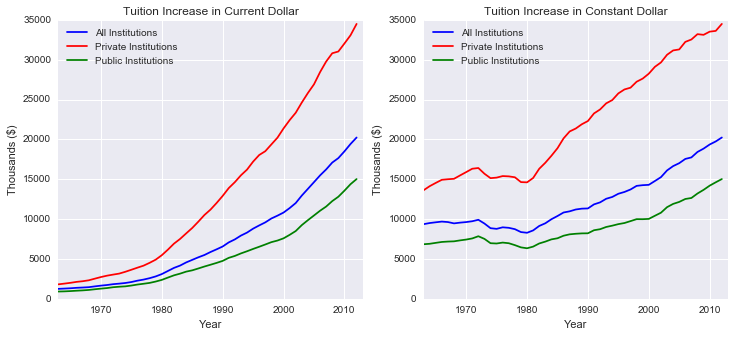

In [18]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

#Setting up left graph for current dollar values

all_institutions.plot(x="YEAR", y='TotalCost/All/Current',ax=ax[0],kind='line',color='blue')
private_institutions.plot(x="YEAR", y='TotalCost/All/Current',ax=ax[0],kind='line',color='red')
public_institutions.plot(x="YEAR", y='TotalCost/All/Current',ax=ax[0],kind='line',color='green')

#Setting up right graph for constant dollar values

all_institutions.plot(x="YEAR", y='TotalCost/All/Constant',ax=ax[1],kind='line',color='blue')
private_institutions.plot(x="YEAR", y='TotalCost/All/Constant',ax=ax[1],kind='line',color='red')
public_institutions.plot(x="YEAR", y='TotalCost/All/Constant',ax=ax[1],kind='line',color='green')

#Cosmetics updates: 

ax[0].set_title("Tuition Increase in Current Dollar")
ax[1].set_title("Tuition Increase in Constant Dollar")
ax[0].set_xlim(1963,2013)
ax[1].set_xlim(1963,2013)
ax[0].set_ylabel('Thousands ($)')    
ax[1].set_ylabel('Thousands ($)')    
ax[0].set_xlabel('Year')
ax[1].set_xlabel('Year')
ax[0].legend(['All Institutions','Private Institutions','Public Institutions'],loc=0)
ax[1].legend(['All Institutions','Private Institutions','Public Institutions'],loc=0)

#### 2.b Student Loan trends

__ Methodology: __

- Visualized the trend in total student debt outstanding on a yearly basis
- Incorporated debt by product type to better understand which products have generated the most debt 

__ Quick Insight: __

Federal Unsubsidized loans have been the main driver of student indebtedness, followed by Federal Subsidized loans, and Non-Federal loans. Outstanding debt started to decrease in 2010 due to the Student Loan Forgiveness Program established by President Obama. 

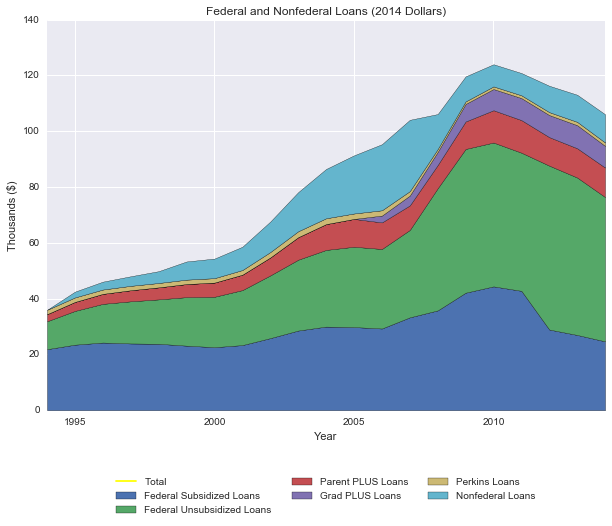

In [19]:
loans_to_plot = loans

y = np.row_stack((loans_to_plot["Federal Subsidized Loans"],loans_to_plot["Federal Unsubsidized Loans"],
                  loans_to_plot["Parent PLUS Loans"],loans_to_plot["Grad PLUS Loans"],loans_to_plot["Perkins Loans"],loans_to_plot["Nonfederal Loans"]))
x = np.arange(1994,2015,1)
                 
fig, ax2 = plt.subplots()
fig.set_size_inches(10.0, 7.0, forward=True)
ax2.stackplot(x, y)
plt.plot(loans_to_plot["Total"],color="yellow")

ax2.set_title("Federal and Nonfederal Loans (2014 Dollars)")
ax2.set_xlim(1994,2014)
ax2.set_ylabel('Thousands ($)')    
ax2.set_xlabel('Year')

label= ["Total","Federal Subsidized Loans","Federal Unsubsidized Loans","Parent PLUS Loans",
               "Grad PLUS Loans","Perkins Loans","Nonfederal Loans"]

ax2.legend(label,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

#### 2.c Macroeconomic Trends and Correlation with Tuition Growth

__ Methodology: __

Chart 1: 

- Set-up a chart with two Y-axes in order to visualize the trends in Nominal GDP, Real GDP, and the Consumer Price Index together
- Plotted data since the 1960s to observe the general trend across the three indicators

Chart 2: 
- Plotted Annual GDP growth rate, as well as loans and tuitions, over the years 
- GPD is shown with a line, while other points are shown as dots

__ Quick Insight: __

Chart 1: 

- The growth in prices has been consistent with the growth in the Real GDP. 

Chart 2: 

- Tuition growth, either private or public, has been more or less in line with GDP growth over the years, hoovering around the GDP growth rate line
- Loans growth, however, is much more irradic. In between 1995 and 2010, we see quite a few years where loans grew much faster than GDP

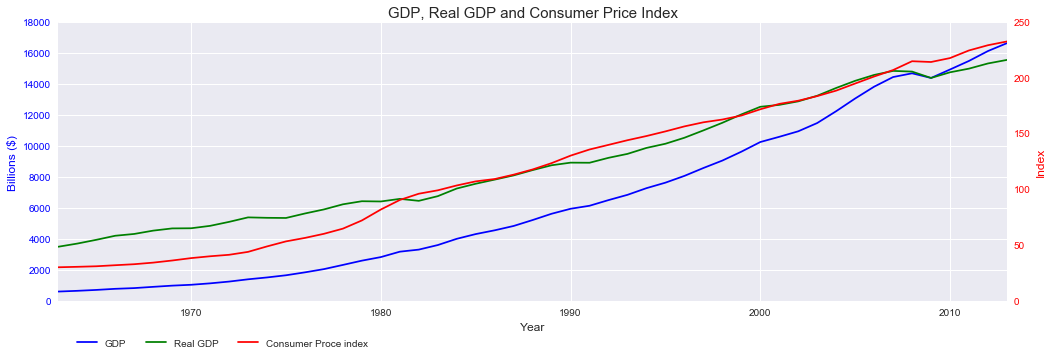

In [20]:
#Setting up the plot area 

fig, axN = plt.subplots()
fig.set_size_inches(17.0, 5.0, forward=True)

#Setting up the information that will be displayed on the plot

##Setting the first 2 series

t = y_gdp['YEAR']
s1 = y_gdp['GDP']
s2 = y_rgdp['GDPC1']

axN.plot(t, s1, 'b')
axN.set_xlabel('Year',fontsize=12)

axN.set_ylabel('Billions ($)', color='b',fontsize=12)
for tl in axN.get_yticklabels():
    tl.set_color('b')

axN.plot(t, y_rgdp['GDPC1'], 'g-')

##Adding the 3rd series

axNN = axN.twinx()
s3 = y_inflation['CPIAUCSL']
axNN.plot(t, s3, 'r')
axNN.set_ylabel('Index', color='r',fontsize=12)
for tl in axNN.get_yticklabels():
    tl.set_color('r')

#Formatting the plot area and labels

axN.set_xlim(1963,2013)
axNN.set_xlim(1963,2013)
axN.grid(color='white', linestyle='-', linewidth=1)
axNN.grid(False)

axN.set_title("GDP, Real GDP and Consumer Price Index", fontsize=15)
label_N= ["GDP","Real GDP"]
label_NN= ["Consumer Proce index"]
axN.legend(label_N,loc=6, bbox_to_anchor=(0.01, -0.15),
          fancybox=True, shadow=True, ncol=3,fontsize=10)
axNN.legend(label_NN,loc=6, bbox_to_anchor=(0.18, -0.15),
          fancybox=True, shadow=True, ncol=3,fontsize=10)

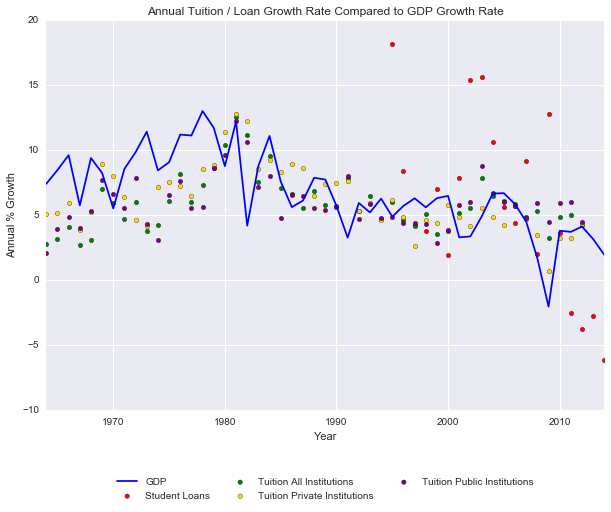

In [21]:
#Setting up the plot area 

fig, ax4 = plt.subplots(1, figsize=(10, 7))

#Setting up the information that will be displayed on the plot

combo_all.plot(x='YEAR', y='all_GDP_g',ax=ax4, kind='line',color='blue')

combo_all.plot(x='YEAR', y='all_loan_g',ax=ax4, kind='scatter',color='red')

combo_all.plot(x='YEAR', y='all_tuition_g',ax=ax4, kind='scatter',color='green')

combo_private.plot(x='YEAR', y='pvt_tuition_g',ax=ax4, kind='scatter',color='gold')

combo_public.plot(x='YEAR', y='pub_tuition_g',ax=ax4, kind='scatter',color='purple')

ax4.set_xlim(1964,2014)
ax4.set_ylim(-10,20)

ax4.set_title("Annual Tuition / Loan Growth Rate Compared to GDP Growth Rate")
ax4.set_ylabel('Annual % Growth')    
ax4.set_xlabel('Year')

label= ["GDP","Student Loans","Tuition All Institutions","Tuition Private Institutions",
               "Tuition Public Institutions"]

ax4.legend(label,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          shadow=True, ncol=3)

#### 2.d Student Default Rate trend


__ Methodology: __
- Visualized the trend in student cohort default rate on a yearly basis from 1998 to 2011. There is a leap in 1991 as for that year the data was not collected.
- The cohort default rate indicates the percentage of students who default within 2 years from the time student enter the repayment period.

__ Quick Insight: __

Prior to 1991, the default rate was significantly higher than it is recently as the majority of default loans were borrowed by proprietary institutions. In 1990 thanks to the Omnibus Budget Reconciliation Act, which made higher education ineligible for federal aid if their cohort default rate was higher than 35% in 1991 and 1992 or 35%, helped bringing down the rate

Source: http://www.edcentral.org/edcyclopedia/federal-student-loan-default-rates/

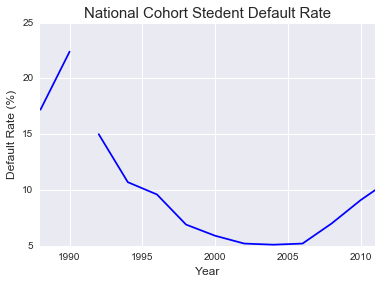

In [22]:
# Pull the data on Student Default Rate from edcentral 
url = 'http://www.edcentral.org/edcyclopedia/federal-student-loan-default-rates/'
am  = pd.read_html(url)

# Get the table with the National Cohort Default rate from 1988 to 2011
default_data = am[1]

# Clean the data and create a column with percentages
default_data = default_data.apply(pd.to_numeric, errors='coerce')
default_data['Percentage'] = default_data['National Cohort Default Rate']*100
default_data.set_index('Year')

# Plot the data
fig, axD = plt.subplots()

# Create the variables to plot (not necessary but easier to edit)
default_time = default_data['Year']
default_percentage = default_data['Percentage']

# Plot the data
axD.plot(default_time, default_percentage, 'b')

#Formatting the plot area and labels

axD.set_title("National Cohort Stedent Default Rate", fontsize=15)
axD.set_xlabel('Year',fontsize=12)
axD.set_xlim(1988,2011)
axD.set_ylabel('Default Rate (%)',fontsize=12)

### Section 3: Thoughts and Conclusion 



In 1979, the government instituted policy that enabled students to obtain more loans to fund their pursuit of higher education. Paired with high inflation rates, this event unleashed significant growth in student debt and opened the door for institutions, particularly private ones, to increase tuition costs.

The effect of this policy is visible in the first charts that show the growth in higher education costs at private and public institutions in the United States. There is a clear inflection point in 1980 where the costs for private institutions skyrocketed.  

At the same time, the students two years default rate reached high levels until 1990 when the Government put a limit to the amount of loans proprietary institutions could lend to students. 

Outstanding student debt has also increased considerably since the 1990s, supported by enabling government policies. The majority of the debt has been unsubsidized. 

The US economy has grown at a stable pace and inflation has been under control, underlying an overall positive environment where people are incentivized to pursue graduate degrees in hopes of being able to benefit from this growth. 

As the graph in 2.c shows though, the outstanding student debt has been growing faster than GDP, reflecting student overreliance on debt to fund higher education. This, paired with the relentless growth in tuition costs signal that student debt is likely to increase further.  

Source: https://www2.ed.gov/offices/OPE/PPI/FinPostSecEd/gladieux.html 